In [341]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

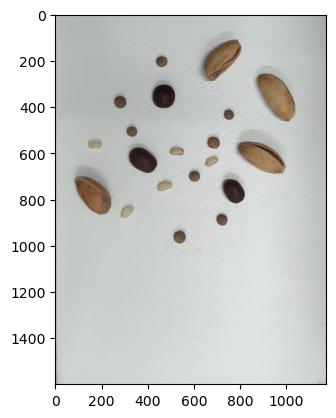

In [342]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path+"Grano2.jpg")
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img2)

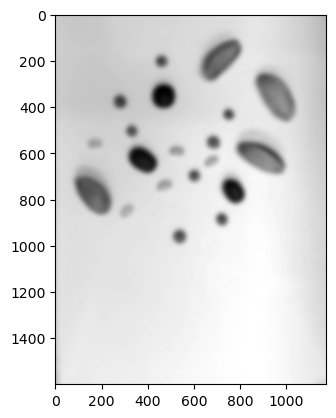

In [343]:
gris = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gris = cv.GaussianBlur(src=gris, ksize=(49,49), sigmaX=10, sigmaY=10)
plt.imshow(gris,cmap="gray")

# **POR ÁREA**

In [344]:
import numpy as np


params = cv.SimpleBlobDetector_Params()

#Si filtramos por area
params.filterByArea = True
params.minArea = 800
params.maxArea = 5000

params.filterByCircularity = False

params.filterByConvexity = False

params.filterByInertia = False

In [345]:
detector = cv.SimpleBlobDetector_create(params)

keypoints = detector.detect(gris)


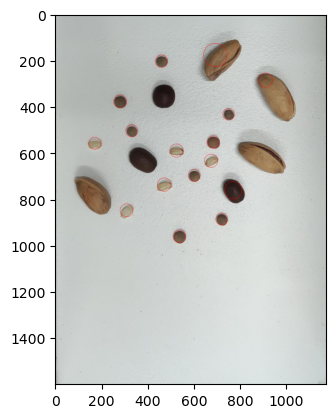

In [346]:
import numpy as np


blank = np.zeros((1,1))
blobs = cv.drawKeypoints(img2.copy(), keypoints, blank, (255,0,0),
                         cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(blobs)

# **POR CIRCULARIDAD**

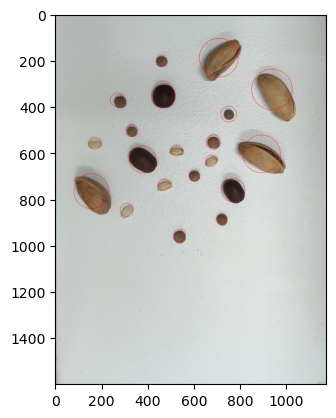

In [353]:
params = cv.SimpleBlobDetector_Params()

params.filterByArea = False
params.minArea = 200
params.maxArea = 3000

params.filterByCircularity = True
params.minCircularity = 0.1
params.maxCircularity = 0.9


params.filterByConvexity = False

params.filterByInertia = False

detector = cv.SimpleBlobDetector_create(params)

keypoints = detector.detect(gris)

blank = np.zeros((1,1))
blobs = cv.drawKeypoints(img2.copy(), keypoints, blank, (255,0,0),
                         cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(blobs)